# Metricas adicionales para saber qué tan bueno es el modelo

In [5]:
import machine_learning_tool
from machine_learning_tool import MLPipelineSD
from importlib import reload
reload(machine_learning_tool)
import sklearn.metrics as metrics
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Casos

In [24]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, description="BEST MODELS", columns_type=MLPipelineSD.all_columns)

In [25]:
columns_type=MLPipelineSD.all_columns
len(columns_type['cols'])

50

In [26]:
model.objective_variable

'casos_'

In [27]:
model.run(feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":True},
          model_function=model.XGBClassifier, show_metrics=True)

[14:10:02] ======== Monitor: Learner ========
[14:10:02] GetGradient: 0.142602s, 100 calls @ 1426us
[14:10:02] PredictRaw: 0.0092789s, 100 calls @ 92us
[14:10:02] UpdateOneIter: 8.90239s, 100 calls @ 89023us
[14:10:02] ======== Monitor: GBTree ========
[14:10:02] BoostNewTrees: 8.34959s, 100 calls @ 83495us
[14:10:02] CommitModel: 0.399922s, 100 calls @ 3999us


C:\Users\danny\.conda\envs\env_asus_old\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\danny\.conda\envs\env_asus_old\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[14:10:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=7
[14:10:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[14:10:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=7
[14:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[14:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[14:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[14:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[14:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[14:10:29] INFO: src/tree/updater_prune.cc:74: t

[14:10:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[14:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[14:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[14:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[14:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=7
[14:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=7
[14:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=7
[14:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[14:10:35] INFO: src/tree/updater_prune.cc:74: t

In [28]:
probs=model.model.predict_proba(model.X_test)
preds=probs
roc_auc=metrics.roc_auc_score(model.y_test, probs[:,1])
#fpr, tpr, threshold = metrics.roc_curve(model.y_test, preds)
#roc_auc = metrics.auc(fpr, tpr)

In [29]:
roc_auc

0.9161539009348263

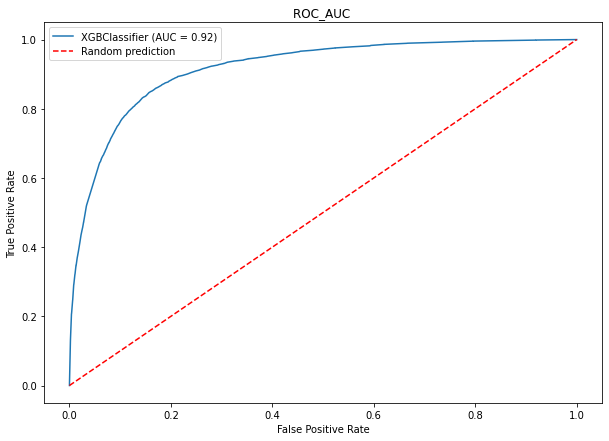

In [30]:
from sklearn import datasets, metrics, model_selection, svm
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fast')


metrics.plot_roc_curve(model.model, model.X_test, model.y_test)
plt.plot([0, 1], [0, 1],'r--', label='Random prediction')
pyplot.legend()
plt.title('ROC_AUC ')
plt.show()

In [31]:
model.model.feature_importances_
sum(sorted(model.model.feature_importances_))

1.000000004307367

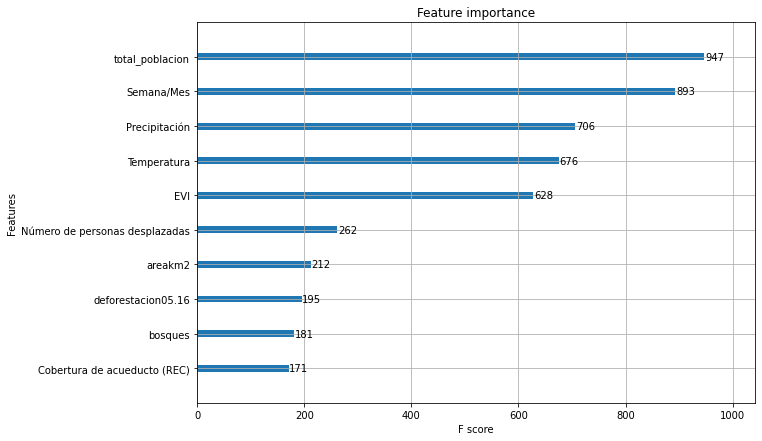

In [32]:
from matplotlib import pyplot
from xgboost import plot_importance
#pyplot.bar(range(len(model.model.feature_importances_)), model.model.feature_importances_)
plot_importance(model.model, max_num_features=10)
pyplot.show()

# Incidencia

In [110]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, description="BEST MODELS", objective_variable='incidencia', columns_type=MLPipelineSD.all_columns)

In [111]:
columns_type=MLPipelineSD.all_columns
len(columns_type['cols'])

50

In [112]:
model.objective_variable

'incidencia'

[13:35:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Training and test predicting phase finished 

mean_absolute_error 54.687449990396786
mean_squared_error 6523.693066549997
r2_score 0.5923960170399761
explained_variance_score 0.6213283830085257


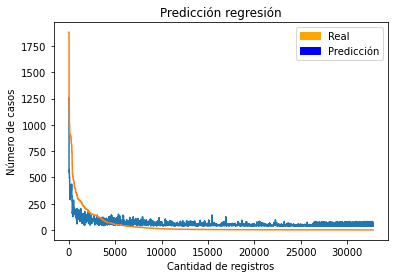

In [113]:
model.run(feature_scaling_function=model.standardization,
          model_function=model.XGBRegressor, classification=False, random_sate=7, show_metrics=True)

In [114]:
model.model.feature_importances_

array([0.        , 0.01675529, 0.04619327, 0.03138978, 0.07665013,
       0.00800317, 0.00050855, 0.01264469, 0.04034531, 0.01523099,
       0.00690601, 0.        , 0.01592499, 0.        , 0.01068596,
       0.01087775, 0.        , 0.02035177, 0.02551868, 0.01653703,
       0.00986625, 0.02372282, 0.01502347, 0.        , 0.04478928,
       0.        , 0.02580209, 0.01076989, 0.01797234, 0.0680816 ,
       0.03922201, 0.02183268, 0.00967471, 0.00953228, 0.00632971,
       0.0494525 , 0.05748583, 0.00166546, 0.0028992 , 0.02771179,
       0.01560816, 0.01530744, 0.06667604, 0.00316921, 0.04265994,
       0.02458838, 0.00187075, 0.01292899, 0.        , 0.02083378],
      dtype=float32)

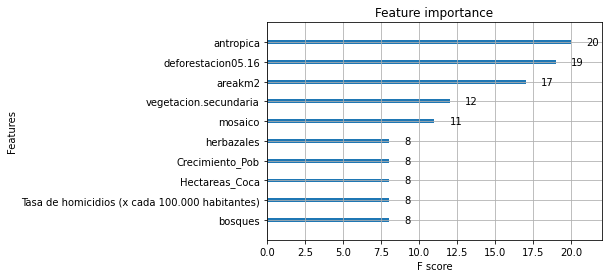

In [115]:
from matplotlib import pyplot
from xgboost import plot_importance
#pyplot.bar(range(len(model.model.feature_importances_)), model.model.feature_importances_)
plot_importance(model.model, max_num_features=10)
pyplot.show()

# Casos departamental

In [8]:
import pandas as pd
df_departamental_complete = pd.read_csv('datos/mensual_departamental.csv')

In [9]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

[16:04:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Training and test predicting phase finished 

mean_absolute_error 10.046789450423693
mean_squared_error 377.7126968810054
r2_score 0.8071661404246441
explained_variance_score 0.8071799848967248


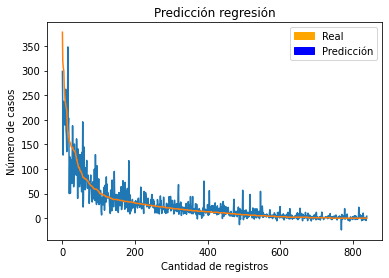

In [10]:
model.run(classification=False, test_size=0.25, feature_scaling_function=model.standardization, model_function=model.XGBRegressor, hyperparameters={"n_estimators":1000, "random_state":7}, show_metrics=True, inv_feature_scaling=True, no_zeros_ds=False)

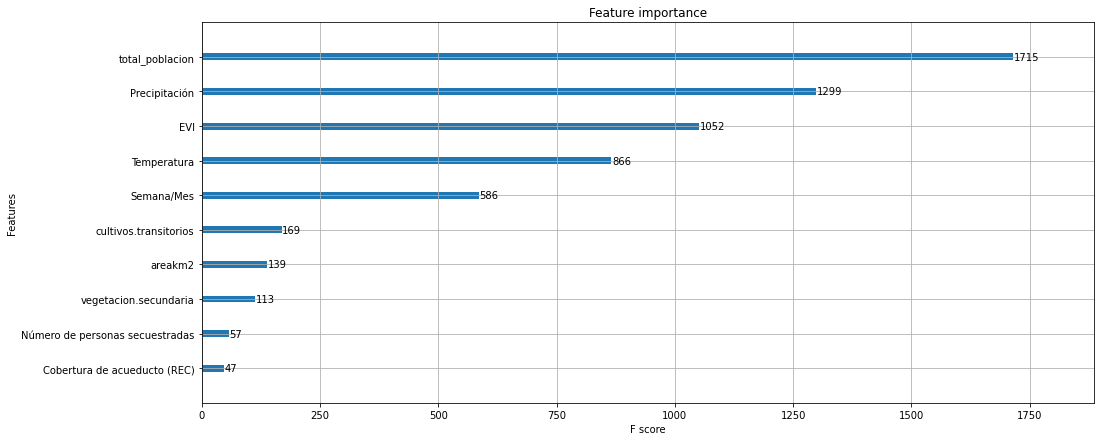

In [84]:
from matplotlib import pyplot
from xgboost import plot_importance
#pyplot.bar(range(len(model.model.feature_importances_)), model.model.feature_importances_)
plot_importance(model.model, max_num_features=10)
pyplot.show()

In [73]:
import matplotlib.patches as mpatches
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 7)
plt.style.use('fast')


In [79]:
model.y

2031    1.804069
1044   -0.423162
1794    0.204512
2778   -0.544647
2325    0.609463
          ...   
2987   -0.544647
1592   -0.544647
664    -0.281429
1089   -0.483904
1156   -0.342172
Name: casos_, Length: 3360, dtype: float64

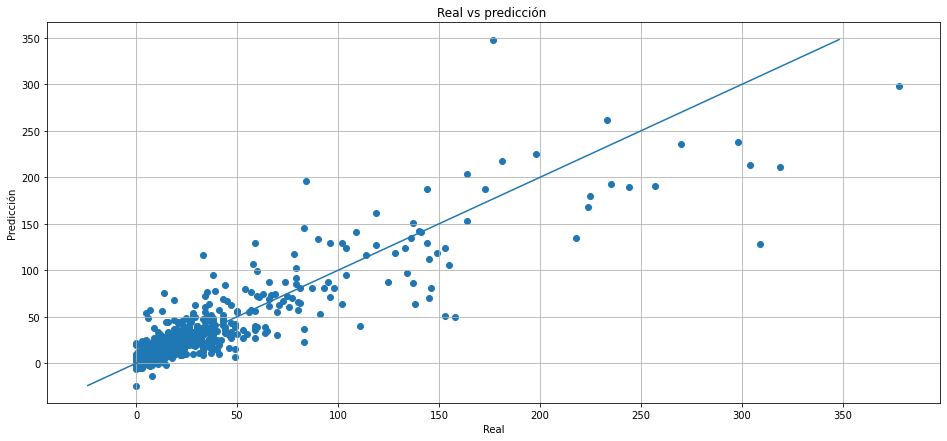

In [83]:
plt.figure()
identity_line = np.linspace(model.y_predict.min(), model.y_predict.max())
plt.scatter(model.y_test, model.y_predict)
plt.title('Real vs predicción ')
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.plot(identity_line, identity_line)
plt.grid(True)
plt.show()

In [71]:
model.model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1000,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 7,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

# USAR EL MODELO

In [13]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, description="BEST MODELS", columns_type=MLPipelineSD.all_columns_monthly)

In [14]:
model.run(feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":True},
          model_function=model.XGBClassifier)

[11:06:18] ======== Monitor: Learner ========
[11:06:18] GetGradient: 0.150577s, 100 calls @ 1505us
[11:06:18] PredictRaw: 0.0079787s, 100 calls @ 79us
[11:06:18] UpdateOneIter: 8.75022s, 100 calls @ 87502us
[11:06:18] ======== Monitor: GBTree ========
[11:06:18] BoostNewTrees: 8.15981s, 100 calls @ 81598us
[11:06:18] CommitModel: 0.431851s, 100 calls @ 4318us


C:\Users\danny\.conda\envs\env_asus_old\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\danny\.conda\envs\env_asus_old\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\danny\.conda\envs\env_asus_old\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  depr

[11:07:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=7
[11:07:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=7
[11:07:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=7
[11:07:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[11:07:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=7
[11:07:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[11:07:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=7
[11:07:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[11:07:30] INFO: src/tree/updater_prune.cc:74: t

In [15]:
probs=model.model.predict_proba(model.X_test)
preds=probs[:,1]
roc_auc=metrics.roc_auc_score(model.y_test, probs[:,1])
#fpr, tpr, threshold = metrics.roc_curve(model.y_test, preds)
#roc_auc = metrics.auc(fpr, tpr)

In [16]:
roc_auc

0.9163183606675922

In [97]:
threshold = [0.69]#list(np.arange(0.01,1,0.01))

In [98]:
f1_m=[]
recall_m=[]
a = 2
for i in threshold:
    th=i
    pred=preds >= th
    model.y_predict=pred
    a=model.calculate_metrics()
    f1_m.append((th,a['f1_macro']))
    recall_m.append((th,a['recall_macro']))

In [99]:
print(a["classification_report"])

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     27563
           1       0.63      0.73      0.67      5257

    accuracy                           0.89     32820
   macro avg       0.79      0.82      0.80     32820
weighted avg       0.90      0.89      0.89     32820



In [91]:
f1_m

[(0.01, 0.21465016127461056),
 (0.02, 0.28239783441882205),
 (0.03, 0.3245374247670598),
 (0.04, 0.3600043147039781),
 (0.05, 0.3927857770474006),
 (0.060000000000000005, 0.42143814031564997),
 (0.06999999999999999, 0.4437098409805722),
 (0.08, 0.4628160143974315),
 (0.09, 0.4819784538534454),
 (0.09999999999999999, 0.5011144462066566),
 (0.11, 0.5197506681977613),
 (0.12, 0.5365533705305635),
 (0.13, 0.5547260653283177),
 (0.14, 0.5690218424842062),
 (0.15000000000000002, 0.5816837168727262),
 (0.16, 0.5934126764184962),
 (0.17, 0.6029132911338665),
 (0.18000000000000002, 0.6126645973819866),
 (0.19, 0.6210101665651768),
 (0.2, 0.6299364541669523),
 (0.21000000000000002, 0.6390603961145425),
 (0.22, 0.6469033897270338),
 (0.23, 0.6544847511479075),
 (0.24000000000000002, 0.6615524464635806),
 (0.25, 0.6688116726066924),
 (0.26, 0.6754472605065254),
 (0.27, 0.6826232590637622),
 (0.28, 0.6886901891393267),
 (0.29000000000000004, 0.6951647552242354),
 (0.3, 0.7013210940782258),
 (0.31, 

In [77]:
f1_m

[0.24794757906859055,
 0.3463006531745383,
 0.40522984941126317,
 0.4515262383031401,
 0.49068849182883884,
 0.5235854365161499,
 0.552655993571582,
 0.5772729680829621,
 0.5982645704602976,
 0.6175228583266021,
 0.6348573214629561,
 0.6485579321499201,
 0.6617490087948497,
 0.6727472222717856,
 0.6831744892110305,
 0.692563460405484,
 0.7012254813703864,
 0.7080075830169795,
 0.714243398886907,
 0.7196741251423935,
 0.7256266872314466,
 0.7305587535925733,
 0.7360437037132722,
 0.7408288889295968,
 0.744916042217916,
 0.7486191549995421,
 0.7528278305193807,
 0.7563430923795922,
 0.7596627486926688,
 0.7626864884707065,
 0.7652472782451862,
 0.7678249322406768,
 0.7704230505744976,
 0.7727090134281827,
 0.7745031691908575,
 0.7769968974938228,
 0.7804112076781646,
 0.7828452689666971,
 0.7843664841124958,
 0.7861648600956053,
 0.7872375439005449,
 0.789559315394699,
 0.7910867930677793,
 0.7922915079554231,
 0.7922050300746899,
 0.7937007848822643,
 0.7951473306643002,
 0.796211560859

In [57]:
print(a["classification_report"])

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     27563
           1       0.61      0.73      0.67      5257

    accuracy                           0.88     32820
   macro avg       0.78      0.82      0.80     32820
weighted avg       0.89      0.88      0.89     32820



## PR_CUR

In [61]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, description="BEST MODELS", columns_type=MLPipelineSD.all_columns)

In [62]:
model.run(feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":True},
          model_function=model.XGBClassifier, show_metrics=True)

[14:28:32] ======== Monitor: Learner ========
[14:28:32] GetGradient: 0.145591s, 100 calls @ 1455us
[14:28:32] PredictRaw: 0.0079795s, 100 calls @ 79us
[14:28:32] UpdateOneIter: 8.84466s, 100 calls @ 88446us
[14:28:32] ======== Monitor: GBTree ========
[14:28:32] BoostNewTrees: 8.29714s, 100 calls @ 82971us
[14:28:32] CommitModel: 0.393947s, 100 calls @ 3939us


C:\Users\danny\.conda\envs\env_asus_old\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\danny\.conda\envs\env_asus_old\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[14:28:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=7
[14:28:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 0 pruned nodes, max_depth=7
[14:28:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=7
[14:28:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=7
[14:28:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=7
[14:28:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=7
[14:28:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=7
[14:28:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=7
[14:28:59] INFO: src/tree/updater_prune.cc:74: t

[14:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[14:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[14:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[14:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 0 pruned nodes, max_depth=7
[14:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[14:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[14:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=7
[14:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[14:29:05] INFO: src/tree/updater_prune.cc:74: t

In [63]:
probs=model.model.predict_proba(model.X_test)
y_true = model.y_test
y_scores=probs[:,1]
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)


In [64]:
precision

array([0.16075469, 0.16072903, 0.16073394, ..., 1.        , 1.        ,
       1.        ])

In [65]:
recall

array([1.00000000e+00, 9.99809777e-01, 9.99809777e-01, ...,
       3.80445121e-04, 1.90222560e-04, 0.00000000e+00])

In [66]:
thresholds

array([0.00197882, 0.00197959, 0.00198059, ..., 0.9875937 , 0.988009  ,
       0.98855394], dtype=float32)

In [67]:
auc_pr = auc(recall, precision)

In [68]:
auc_pr

0.7163128221186288

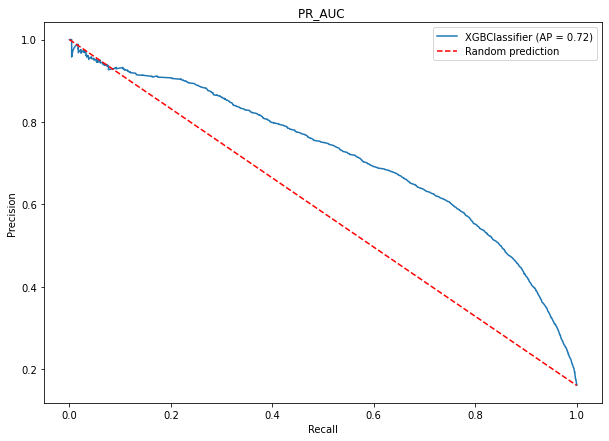

In [71]:
from sklearn import datasets, metrics, model_selection, svm
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fast')


metrics.plot_precision_recall_curve(model.model, model.X_test, model.y_test)
plt.plot([0, 1], [1, 0.16],'r--', label='Random prediction')
pyplot.legend()
plt.title('PR_AUC ')
plt.show()

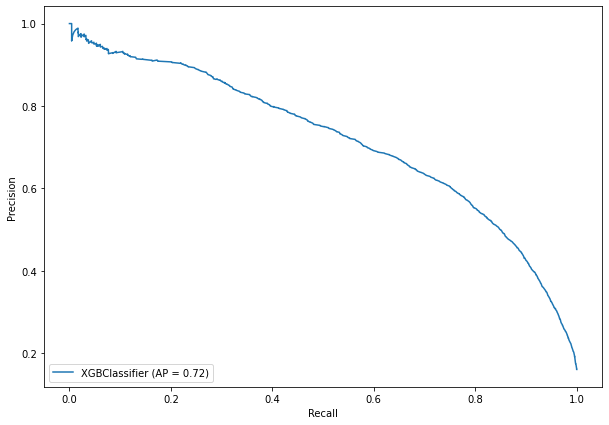

In [72]:
from sklearn import datasets, metrics, model_selection, svm
import matplotlib.pyplot as plt  
metrics.plot_precision_recall_curve(model.model, model.X_test, model.y_test)  
plt.show()

In [52]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, description="BEST MODELS", columns_type=MLPipelineSD.all_columns_monthly)

In [53]:
model.run(feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":True},
          model_function=model.XGBClassifier)

[20:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[20:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=7
[20:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[20:33:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[20:33:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=7
[20:33:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[20:33:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=7
[20:33:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[20:33:38] INFO: src/tree/updater_prune.cc:74: t

[20:33:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=7
[20:33:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[20:33:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[20:33:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=7
[20:33:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=7
[20:33:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[20:33:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[20:33:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[20:33:54] INFO: src/tree/updater_prune.cc:74: t

In [54]:
probs=model.model.predict_proba(model.X_test)
y_true = model.y_test
y_scores=probs[:,1]
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [55]:
auc_pr = auc(recall, precision)

In [56]:
auc_pr

0.717816839342465

<BarContainer object of 50 artists>

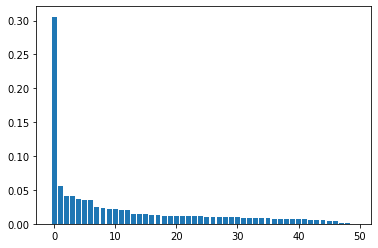

In [12]:
pyplot.bar(range(len(sorted(model.model.feature_importances_, reverse=True))), sorted(model.model.feature_importances_,reverse=True))